In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data Understanding

- Data có là bảng `hw3_f_customer_metainfo.csv`

Bài toán nhằm mục đích xây dựng mô hình phân loại nhãn tín dụng của khách hàng (biến `credit_label` có 2 giá trị là **Good**, **Bad**)


In [17]:
import pandas as pd

df = pd.read_csv('./data/hw3_f_customer_metainfo.csv', index_col=0)
df.head(3)

,customer_id,credit_label,member_id,full_name,gender,date_of_birth,address,city,country,phone_number,...,total_tax_amount,income_source,annually_income_segment,monthly_income,total_property_value,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,50419,Good,50419,Võ Thành H***g,Nữ,1998-12-23,"1614/76/69/34/259, Đường Số 10, Phường Linh Tâ...",Đồng Nai,Việt Nam,001-840-870-5465x539,...,7665000,Kinh doanh online,Trên 3 tỷ,900000000,1100000000,Nhà ở chính,Có,43300000,555240000,13
1,458,Good,458,Mạc Hồng H**h,Nữ,2001-04-15,"760/45/196h, Đường Võ Văn C, Phường 6, Quận 11...",Hà Nội,Việt Nam,674-533-3993,...,9071000,Kinh doanh truyền thống,Trên 3 tỷ,615000000,400000000,Bất động sản thương mại,Có,31600000,289176000,14
2,20532,Good,20532,Sơn Thành L**h,Nữ,1995-12-25,"962/74/78/106, Cách Mạng Tháng Tám, Phường An ...",Bình Dương,Việt Nam,841-221-6697,...,7921000,Đầu tư,Dưới 300 triệu,646000000,300000000,Đất đai,Có,49800000,243228000,8


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        5000 non-null   int64  
 1   credit_label                       5000 non-null   object 
 2   member_id                          5000 non-null   int64  
 3   full_name                          5000 non-null   object 
 4   gender                             5000 non-null   object 
 5   date_of_birth                      5000 non-null   object 
 6   address                            5000 non-null   object 
 7   city                               5000 non-null   object 
 8   country                            5000 non-null   object 
 9   phone_number                       5000 non-null   object 
 10  email                              5000 non-null   object 
 11  occupation                         5000 non-null   objec

Bộ dữ liệu 5000 quan sát và 67 cột.

In [19]:
label_counts = df["credit_label"].value_counts()
label_counts

Good    4769
Bad      231
Name: credit_label, dtype: int64

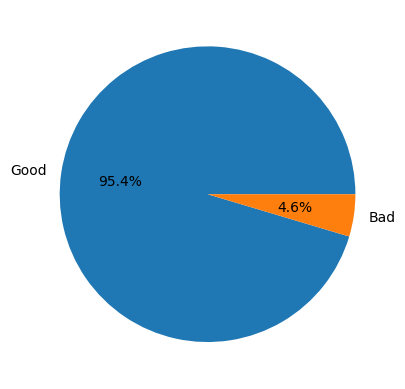

In [20]:
labels = label_counts.index.to_list()
sizes = label_counts.to_list()
plt.pie(sizes, labels = labels, autopct='%1.1f%%');

=> Bộ dữ liệu có sự bất cân bằng giữa hai phân nhóm ta cần phân loại là **Good** và **Bad**

## Nhóm dữ liệu định danh khách hàng

In [21]:
customer_info_cols = ['customer_id','full_name', 'gender', 'date_of_birth', 'age' 'address',
                      'city', 'country', 'phone_number', 'email', 'occupation',
                      'education', 'marital_status']

In [22]:
df['gender'].value_counts()

Nữ      2469
Nam     2441
Khác      90
Name: gender, dtype: int64

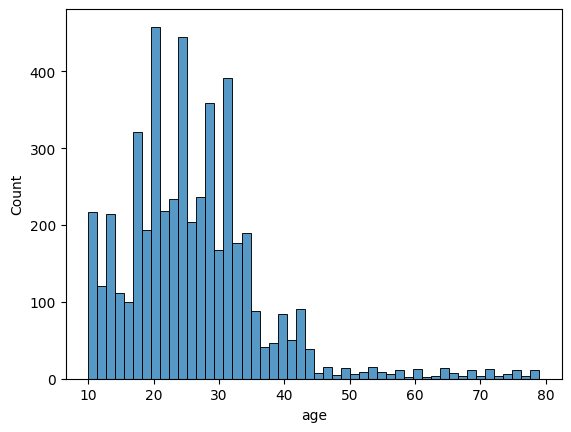

In [23]:
sns.histplot(df['age']);

==> Khách hàng tập trung chủ yếu ở khoảng tầm 18 - 35 tuổi, khách hàng trên 45 tuổi rất ít

In [24]:
df['city'].value_counts()

Hà Nội            878
Hồ Chí Minh       868
Đà Nẵng           400
Bình Dương        377
Cần Thơ           340
                 ... 
Thừa Thiên Huế     19
Lai Châu           19
Kon Tum            18
Tuyên Quang        17
Hải Dương          14
Name: city, Length: 62, dtype: int64

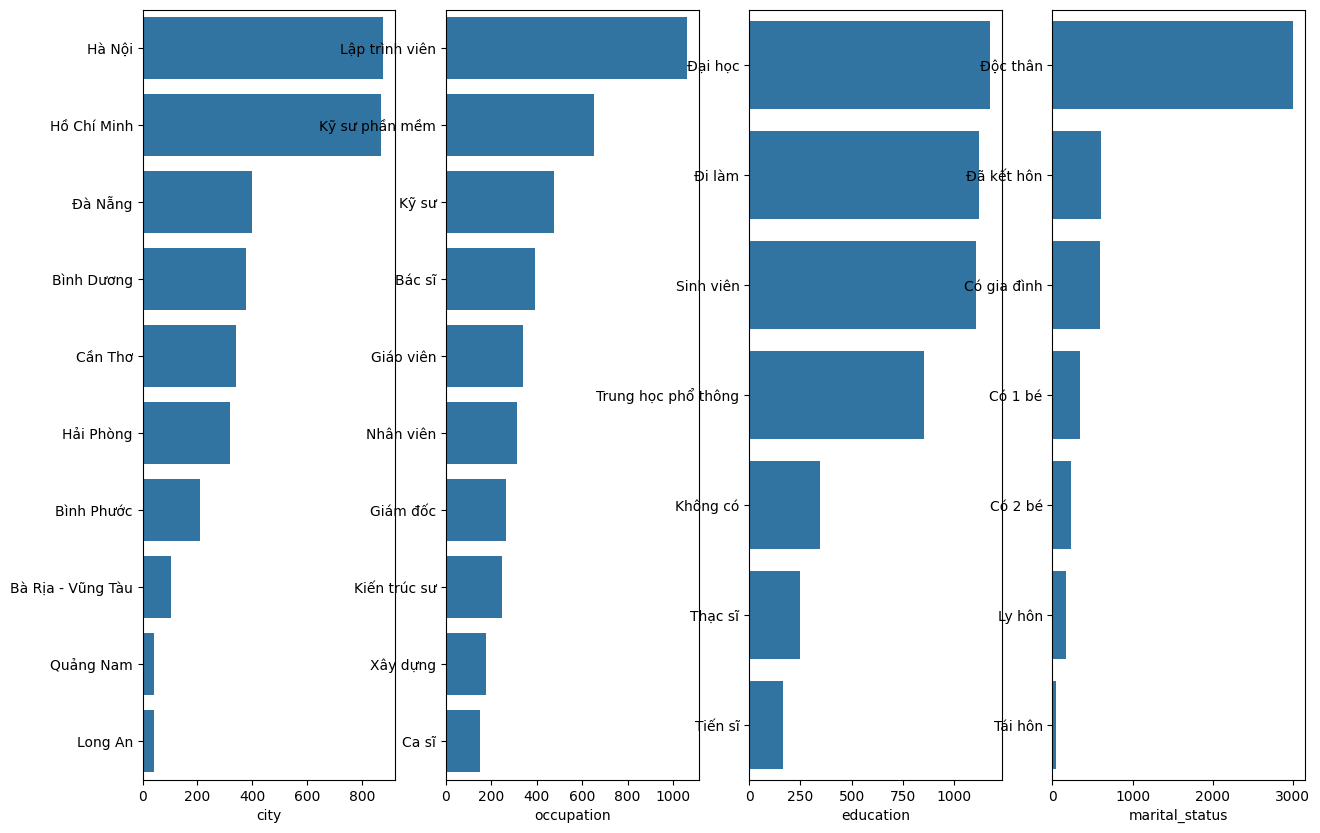

In [25]:
fig, axes = plt.subplots(1,4, figsize=(15, 10))
l = ['city', 'occupation', 'education', 'marital_status']
for i in range(4):
  sns.barplot(df[l[i]].value_counts().head(10), orient="y", ax=axes[i])


- Biểu đồ thể hiện top 10 tỉnh/ thành phố có số lượng khách hàng theo thứ tự giảm dần cho thấy Khách hàng tập trung chủ yếu ở các thành phố lớn, đông nhất là **Hà Nội**, **TPHCM**.
- Khách hàng trong độ tuổi 18- 35 tuổi chiếm tỉ trọng cao, tương ứng với trình độ học vấn đang đi làm hoặc đang đi học đại học cũng chiếm tỉ lệ cao.

## Nhóm dữ liệu thông tin thành viên

Gồm các cột: `'member_id', 'membership_level',
       'join_date', 'expiry_date', 'membership_status', 'customer_points',
       'total_redeemed_points', 'discount_rate', 'referral_code', 'age',
       'membership_lifespan', 'num_day_since_last_active',
       'num_active_last_7d', 'num_active_last_14d', 'num_active_last_30d',
       'signup_in_latenight', 'most_active_hour', 'num_apply_lending',
       'num_reject_lending_by_3pt'`

Cột `expiry_date` có giá trị NaN. Nếu thành viên còn active (`membershio_status` = `Active`), thì expiry_date là NaN, còn nếu tài khoản thành viên đã quá hạn (`membershio_status` = `Expired`), thì sẽ có giá trị expiry_date.

In [26]:
df[['member_id', 'membership_level', 'join_date', 'expiry_date', 'membership_status', 'membership_lifespan']].head(5)

,member_id,membership_level,join_date,expiry_date,membership_status,membership_lifespan
0,50419,VIP,2015-07-24,NaN,Active,837
1,458,VIP,2018-05-30,NaN,Active,311
2,20532,VIP,2018-12-25,NaN,Active,849
3,11655,VIP,2022-04-11,NaN,Active,821
4,43585,VIP,2015-12-12,NaN,Active,527


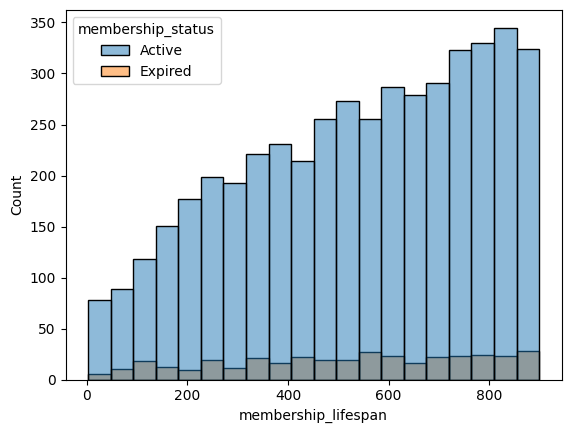

In [27]:
sns.histplot(df, x = 'membership_lifespan', hue = 'membership_status');

Hình trên thể hiện lifespan của các thành viên có tài khoản đang hoạt động cũng như tài khoản đã quá hạn. Ta thấy:
- Với các tài khoản thành viên đang hoạt động, khi giá trị lifespan càng cao, số lượng tài khoản tương ứng với lifespan cũng tăng lên.

- Với tài khoản bất hoạt, số lượng tài khoản với lifespan khác nhau phân bố khá đều, như vậy khi lifespan tăng lên, $\frac{{\text{Số tài khoản bất hoạt}}}{{\text{Số tài khoản hoạt động}}}$
  giảm đi.

Tất nhiên ta còn cần nhiều yếu tố để đánh giá, nhưng điều này có thể xem là một dấu hiệu tích cực cho thấy đơn vị đang cung cấp dịch vụ hiệu quả, giúp giữ chân khách hàng qua thời gian.


In [28]:
member_info_cols = [
    "membership_lifespan",
    "num_day_since_last_active",
    "num_active_last_7d",
    "num_active_last_14d",
    "num_active_last_30d",
    "signup_in_latenight",
    "most_active_hour",
    "num_apply_lending",]

## Nhóm dữ liệu liên quan thông tin giao dịch mua sắm

Gồm các cột `'total_amount_spent',
       'total_amount_spent_last_30d', 'total_amount_spent_last_60d',
       'total_amount_spent_last_90d', 'total_amount_spent_last_180d',
       'total_amount_spent_last_365d', 'total_tax_amount_spent',
       'total_fee_amount_spent', 'num_completed_txn', 'num_canceled_txn',
       'num_reject_txn', 'pct_reject2total_txn', 'top_rejected_reason',
       'num_refunded_txn', 'top_refunded_reason', 'top_payment_method',
       'top_payment_channel', 'is_ordering_shipping_address_same'`

In [29]:
trans_cols = ['total_amount_spent',
       'total_amount_spent_last_30d', 'total_amount_spent_last_60d',
       'total_amount_spent_last_90d', 'total_amount_spent_last_180d',
       'total_amount_spent_last_365d', 'total_tax_amount_spent',
       'total_fee_amount_spent', 'num_completed_txn', 'num_canceled_txn',
       'num_reject_txn', 'pct_reject2total_txn', 'top_rejected_reason',
       'num_refunded_txn', 'top_refunded_reason', 'top_payment_method',
       'top_payment_channel', 'is_ordering_shipping_address_same'
]

## Nhóm dữ liệu liên quan thông tin promotion

Gồm các cột `'prob_abuse_promotion', 'num_used_promotion', 'prob_abnormal_activity',
                  'num_select_promotion', 'num_interest_products'`

In [30]:
promotion_cols = ['prob_abuse_promotion', 'num_used_promotion', 'prob_abnormal_activity',
                  'num_select_promotion', 'num_interest_products']

## Nhóm dữ liệu liên quan đến thu nhập

Gồm các cột `'income_spending_ratio', 'income_stability', 'total_tax_amount',
               'income_source', 'annually_income_segment', 'monthly_income'`

In [31]:
income_cols = ['income_spending_ratio', 'income_stability', 'total_tax_amount',
               'income_source', 'annually_income_segment', 'monthly_income']

## Nhóm dữ liệu liên quan đến tài sản

Gồm các cột `'total_property_value', 'top_property_type', 'in_debt'`

In [32]:
asset_cols = ['total_property_value', 'top_property_type', 'in_debt']

## Nhóm dữ liệu liên quan các hoá đơn thanh toán

Gồm các cột `'monthly_bill_amount', 'total_annual_bill_amount', 'num_bill_overdue'`

In [33]:
bill_cols = ['monthly_bill_amount', 'total_annual_bill_amount', 'num_bill_overdue']

In [34]:
feature_df = df[member_info_cols + trans_cols + promotion_cols + income_cols + asset_cols + bill_cols]
feature_df.head()

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,signup_in_latenight,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,...,total_tax_amount,income_source,annually_income_segment,monthly_income,total_property_value,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,837,354,252,303,915,False,3,10,1534419000,258057000,...,7665000,Kinh doanh online,Trên 3 tỷ,900000000,1100000000,Nhà ở chính,Có,43300000,555240000,13
1,311,72,187,69,1000,True,3,19,8341801000,388076000,...,9071000,Kinh doanh truyền thống,Trên 3 tỷ,615000000,400000000,Bất động sản thương mại,Có,31600000,289176000,14
2,849,166,164,226,240,False,21,15,4350035000,924929000,...,7921000,Đầu tư,Dưới 300 triệu,646000000,300000000,Đất đai,Có,49800000,243228000,8
3,821,37,32,273,630,True,6,2,8591000,508054000,...,5771000,Kinh doanh truyền thống,Dưới 300 triệu,628000000,700000000,Căn hộ/Chung cư,Có,30300000,30948000,21
4,527,15,131,473,680,True,1,4,1153566000,935648000,...,1188000,Đầu tư,Trên 1 tỷ,278000000,1100000000,Bất động sản thương mại,Không,38800000,458592000,20


<ipython-input-35-753ca5bff919>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

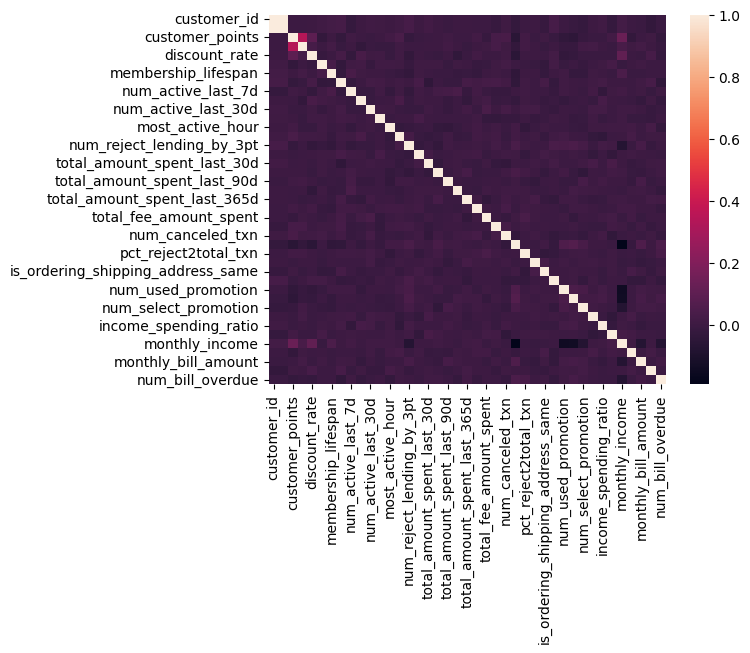

In [35]:
corr = df.corr()
sns.heatmap(corr)

Các biến số ít có tương quan với nhau, trừ hai biến `Customer_points` và `discount_rate`

# Feature Engineering

In [36]:
# Ok giờ ta sẽ chỉ dùng data dạng number thôi
feature = feature_df.select_dtypes(exclude=[object, bool])
feature.head()

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,total_amount_spent_last_60d,...,prob_abnormal_activity,num_select_promotion,num_interest_products,income_spending_ratio,total_tax_amount,monthly_income,total_property_value,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,837,354,252,303,915,3,10,1534419000,258057000,965126000,...,0.94,312,29,0.123289,7665000,900000000,1100000000,43300000,555240000,13
1,311,72,187,69,1000,3,19,8341801000,388076000,734228000,...,0.46,926,10,0.325329,9071000,615000000,400000000,31600000,289176000,14
2,849,166,164,226,240,21,15,4350035000,924929000,202899000,...,0.78,583,44,0.633699,7921000,646000000,300000000,49800000,243228000,8
3,821,37,32,273,630,6,2,8591000,508054000,872911000,...,0.51,985,43,0.068492,5771000,628000000,700000000,30300000,30948000,21
4,527,15,131,473,680,1,4,1153566000,935648000,153210000,...,0.11,657,12,0.162109,1188000,278000000,1100000000,38800000,458592000,20


In [37]:
X = feature
y = df['credit_label']

# 2. Train/Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# 3. Training Model

Ta sẽ thử các thuật toán **Logistic Regression, Ramdom Forest và Decision Tree**

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(m)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

# 4. Evaluate Model

In [52]:
from sklearn.metrics import classification_report
y_predict_logreg_model = log_reg_model.predict(X_test)
y_predict_decision_tree = decision_tree_model.predict(X_test)
y_predict_random_forest = random_forest_model.predict(X_test)

In [53]:
print(classification_report(y_test, y_predict_logreg_model))

              precision    recall  f1-score   support

         Bad       0.74      0.63      0.68        62
        Good       0.98      0.99      0.99      1438

    accuracy                           0.98      1500
   macro avg       0.86      0.81      0.83      1500
weighted avg       0.97      0.98      0.97      1500



In [54]:
print(classification_report(y_test, y_predict_decision_tree))

              precision    recall  f1-score   support

         Bad       0.51      0.58      0.54        62
        Good       0.98      0.98      0.98      1438

    accuracy                           0.96      1500
   macro avg       0.74      0.78      0.76      1500
weighted avg       0.96      0.96      0.96      1500



In [55]:
print(classification_report(y_test, y_predict_random_forest))

              precision    recall  f1-score   support

         Bad       0.86      0.61      0.72        62
        Good       0.98      1.00      0.99      1438

    accuracy                           0.98      1500
   macro avg       0.92      0.80      0.85      1500
weighted avg       0.98      0.98      0.98      1500

